#Import Libraries and Datasets:

In [1]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 18.8MB/s]


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ads.csv', index_col=0)

In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9




*  TV: Money spent on the TV marketing

*  Radio: Money spent on the radio marketing

*  Newspaper: Money spent on the newspaper marketing


  



#EDA - Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


As you can see there are total **4 variables Datatype** of all the variables is **float64**, means they all are **numeric**

In [7]:
df.shape

(200, 4)

In this dataset we have 200 Rows and 4 Columns .

In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
info = pd.DataFrame(df.isnull().sum(),columns = ["IsNull"])

info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique().sum(),True)
info.insert(4,"Min",df.min().sum(),True)
info.insert(5,"Max",df.max().sum(),True)
info.T

,TV,radio,newspaper,sales
IsNull,0.0,0.0,0.0,0.0
IsNa,0.0,0.0,0.0,0.0
Duplicate,0.0,0.0,0.0,0.0
Unique,650.0,650.0,650.0,650.0
Min,2.6,2.6,2.6,2.6
Max,487.0,487.0,487.0,487.0


#Here we have 650 unique values in each columns and zero null values.

In [11]:
#Statistical
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#Data Visualization

<Axes: ylabel='Frequency'>

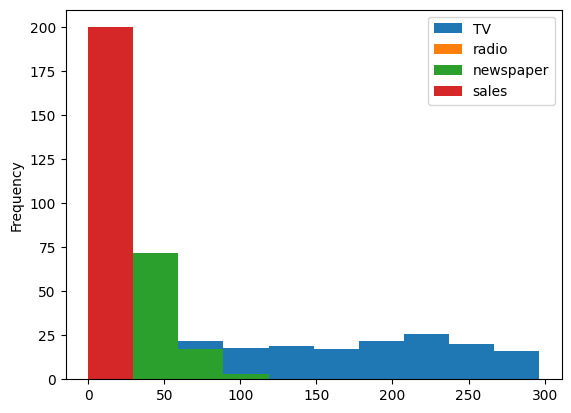

In [12]:
df.plot(kind='hist')

#Boxplot :

#1. A box plot displays a ton of information in a simplified format. Analysts frequently use them during exploratory data analysis because they display your dataset’s

*   central tendency,
*   skewness & spread,
*   outliers.

#2. Box plots display the five-number summary. This summary includes five key data points:
- The smallest number (minimum)
- The first quartile (25% mark)
- The middle number (median)
- The third quartile (75% mark)
- The largest number (maximum)

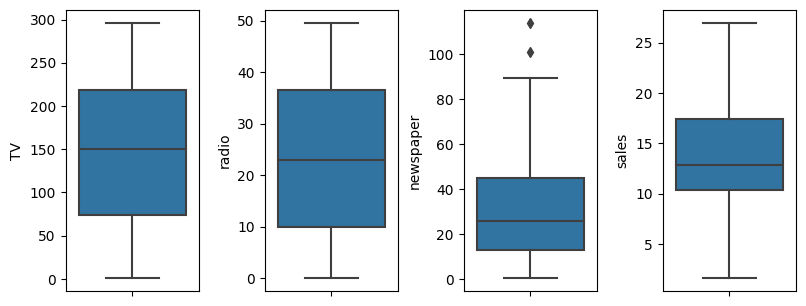

In [13]:
#Boxplot:

fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (8,3))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)


Here in newspaper columns we have 'Outliers'

#Scatter Matrix :              
         

*   Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimensions.Scatter plots are very much like line graphs in the concept that they use horizontal and vertical axes to plot data points.
* A scatter matrix is a estimation of covariance matrix when covariance cannot be calculated or costly to calculate.
* The scatter matrix is also used in lot of dimensionality reduction exercises. If there are k variables , scatter matrix will have k rows and k columns i.e k X k matrix.





In [14]:
#Scatter Matrix of each columns
from pandas.plotting import scatter_matrix

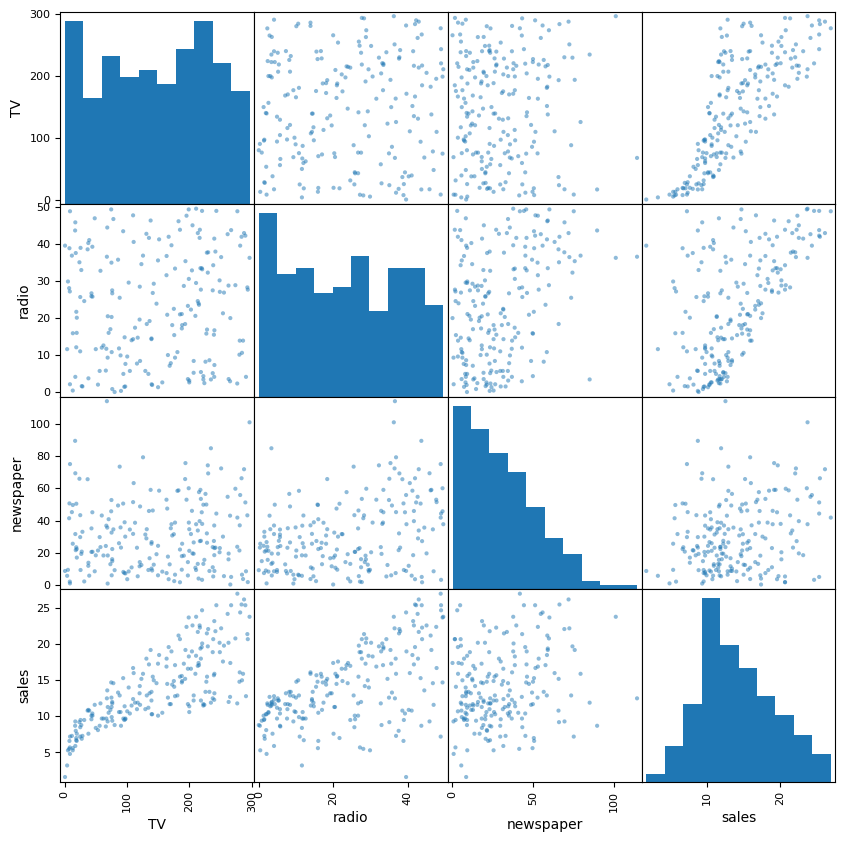

In [15]:
scatter_matrix(df,figsize =(10,10));

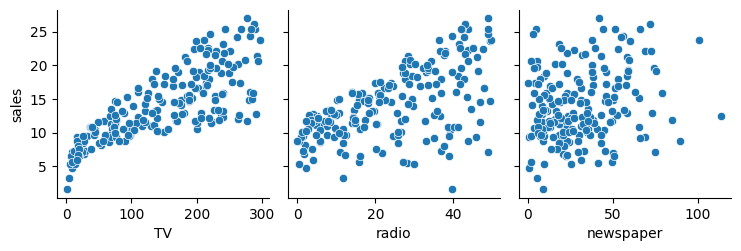

In [16]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales')
plt.show()

#Correlation :

In [17]:
corr = df.corr()

In [18]:
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [19]:
df.TV.corr(df.sales)

0.7822244248616061

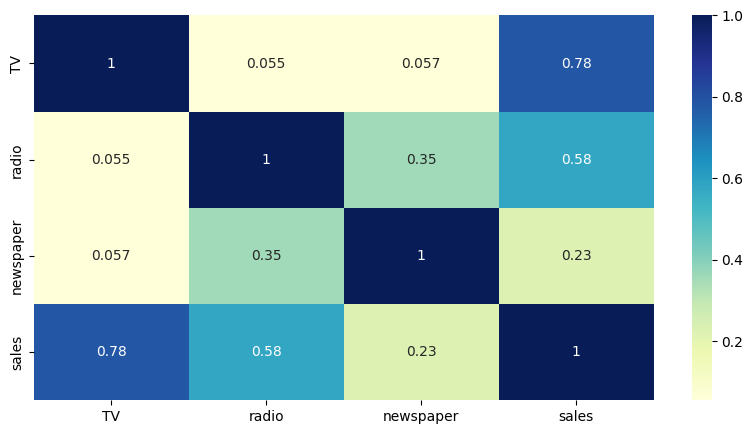

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap="YlGnBu",annot = True)
plt.show()


*   Sales depend on TV, Radio and Newspaper
*   As you can see **Sales** and **TV** are highly correlated
*   TV has a strong positive correlation with sales
*   Radio has medium positive correlation with sales
*   Newspaper has lesser positive correlation with sales
*  We are selecting **Tv variable** because it's **highly correlated** with our predicting **variable Sales**.
*   So we employ **Simple Linear Regression** to analyse the effect of each of them on sales











<Axes: >

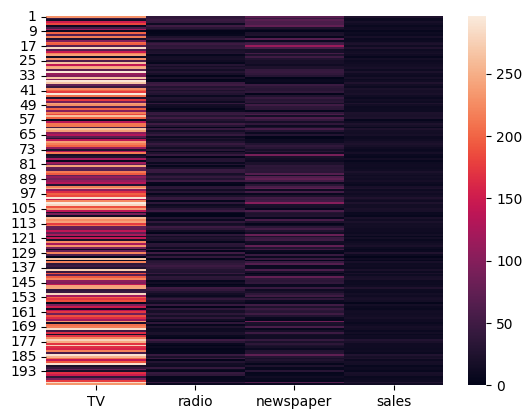

In [21]:
sns.heatmap(df)

#Distribution of data

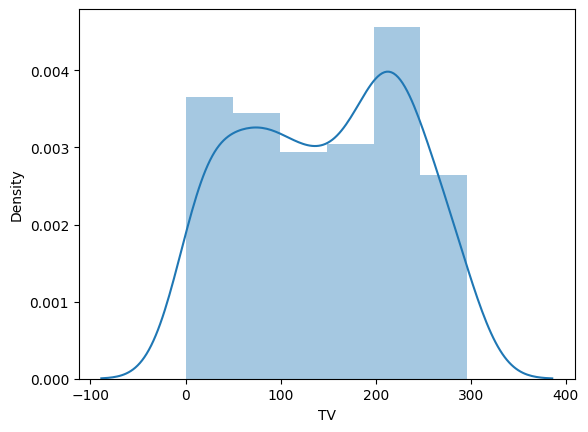

In [22]:
sns.distplot(df.TV)
plt.show()

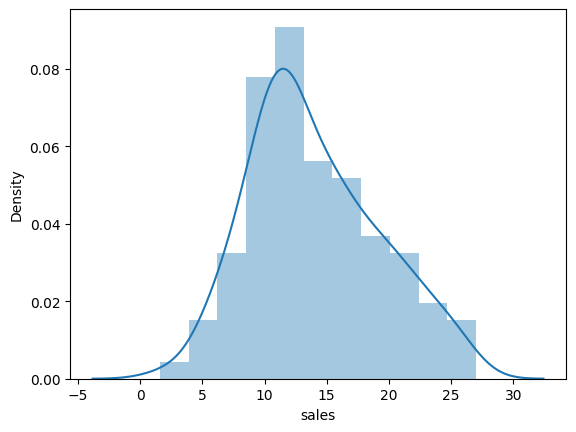

In [23]:
sns.distplot(df.sales)
plt.show()

<Axes: xlabel='newspaper', ylabel='Density'>

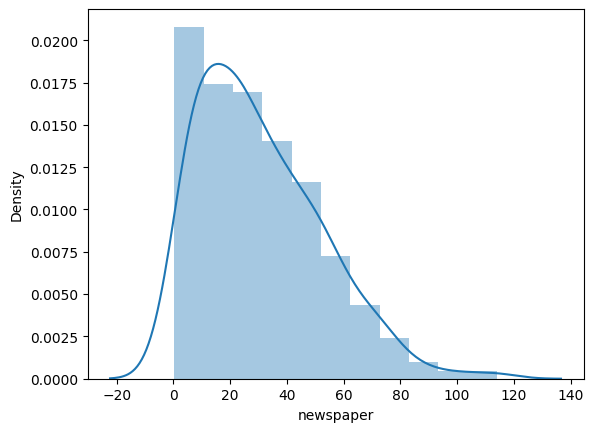

In [24]:
sns.distplot(df.newspaper)

<Axes: xlabel='radio', ylabel='Density'>

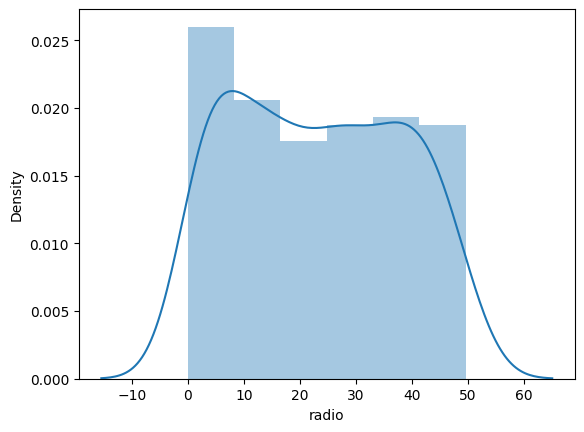

In [25]:
sns.distplot(df.radio)

#Exploring Relationships between Predictors and Response

#And Create a linear model plot with Seaborn library :


   - There are a number of mutually exclusive options for estimating the regression model with the help of seaborn library.

   1. **lmplot**- Combine regplot( ) and FacetGrid to plot multiple linear relationships in a dataset.
   2. **jointplot** -Combine regplot( ) and JointGrid (when used with kind="reg")
   3. **pairplot** -Combine regplot( ) and PairGrid (when used with kind="reg")
   4. **residplot** - Plot the residuals of a linear regression model


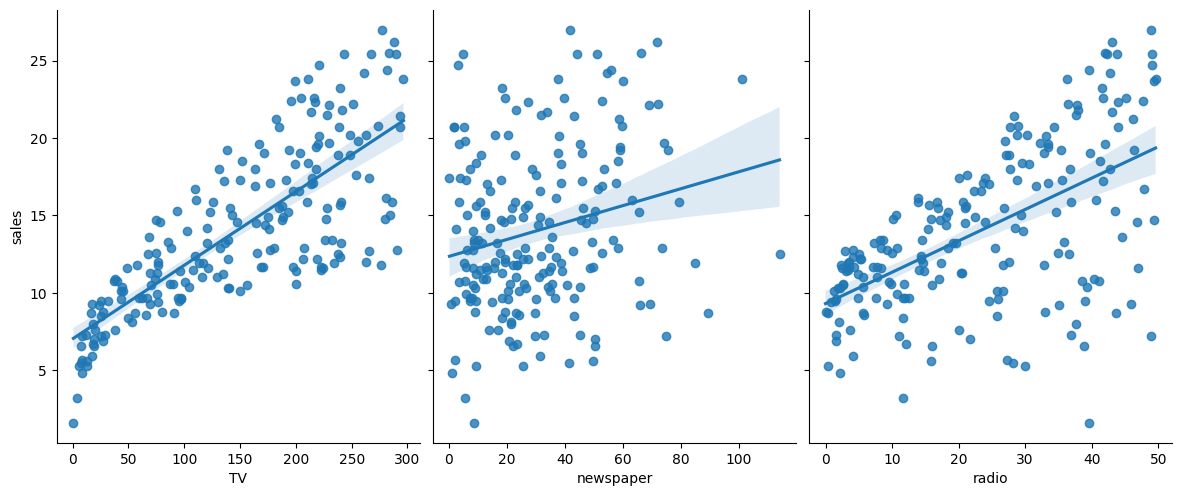

In [26]:
sns.pairplot(df,x_vars=['TV','newspaper','radio'],y_vars='sales',height=5,aspect=0.8,kind='reg')


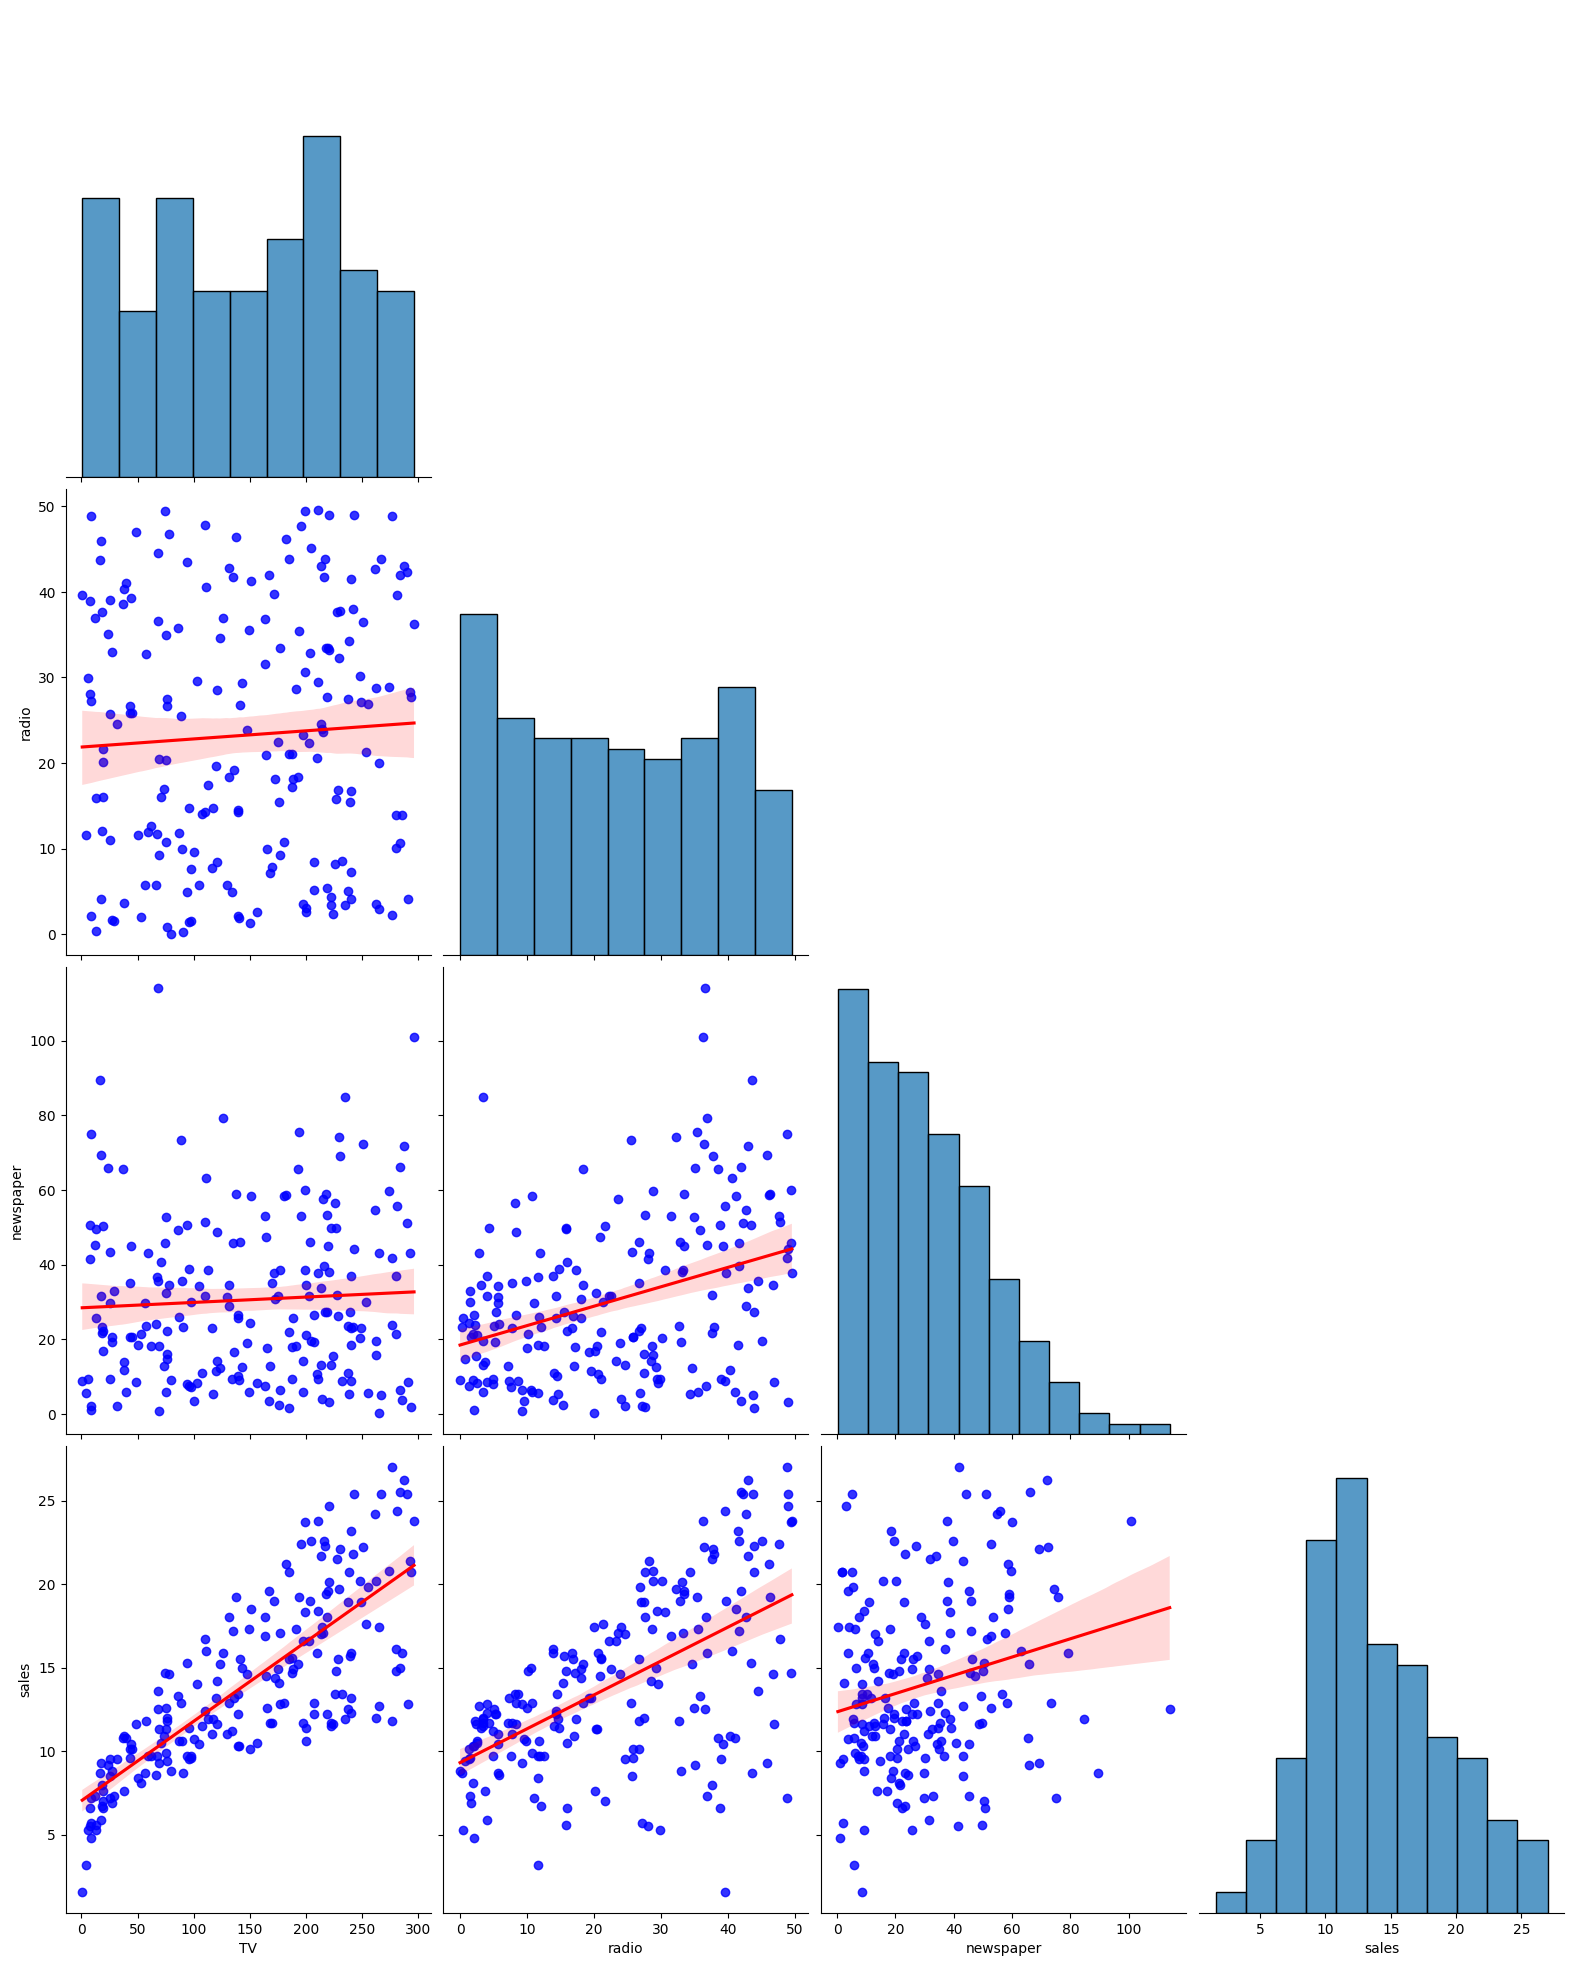

In [27]:
sns.pairplot(df, markers="o",corner=True,height=5,aspect=0.8,kind='reg',diag_kind='auto',
                 plot_kws = {'line_kws':{'color':'red'},
                           'scatter_kws': {'color': 'blue'}})

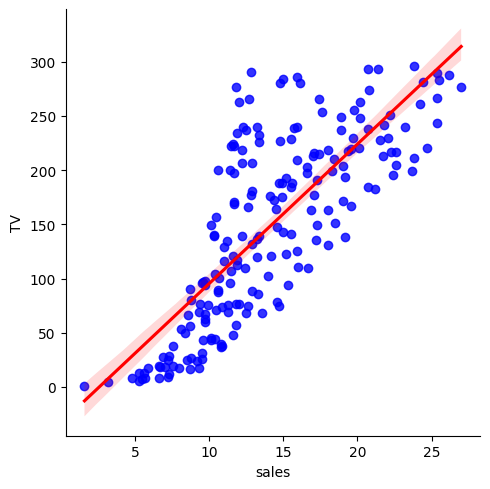

In [28]:
sns.lmplot(x='sales',y='TV',data=df,line_kws={'color': 'red'},scatter_kws={'color':'blue'})

# Linear Regression Model:

- Linear Regression is a linear model that maps a linear relationship between independent variable/s (input features) (x) and dependent variable (y). The goal of a linear regression model is about finding the **“line of best fit”**.
-  You may be familiar with the equation of a **straight line:y = mx+c.** The linear regression model is also represented similarly as an equation of a line. We are approximating y as a linear function of x.
          





---


\begin{align*}
h\theta(x) &= \theta_0 + \theta_1x
\end{align*}


---




















- Where,  $h\theta(x)$ : represents our predicted outcome as the linear function of x. We write $h\theta(x)$ instead of y to denote that the model is a hypothesis function.

- $\theta_0$ and $\theta_1$ : two unknown constants that represent the intercept and slope terms in the linear model.$\theta_0$ and $\theta_1$ together represent the model coefficients or parameters or weights. They are what our model “learns” during optimization.

- There are two types of linear regression:
1. Simple Linear Regression
2. Multiple Linear Regression



# ML Model :
Here i use use the scikit-learn library to create ML models. When coding, this library is written as sklearn.

The steps to building and using a model are:

1 - **Define:** What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

2 - **Fit:** Capture patterns from provided data. This is the heart of modeling.

3 - **Predict:** Just what it sounds like

4 - **Evaluate:** Determine how accurate the model's predictions are.

In [29]:
X = df[['TV']]
X.head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [30]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [31]:
y = df.iloc[:,-1]
print(type(y))
print(y.shape)


<class 'pandas.core.series.Series'>
(200,)


In [32]:
#from sklearn to split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#Creating a Simple Linear Regression Model :

In [33]:
#Training the model : Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

#Create an instance of a LinearRegression() model named linreq
linreg = LinearRegression()

#Train/fit linreq on the training data
linreg.fit(X_train,y_train)

LinearRegression()

#Predicting Test Data :

In [34]:
y_pred = linreg.predict(X_test)

In [35]:
y_pred[:5]

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747])

#Interpreting Model Coefficients:
- The attributes of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁.



In [36]:
print(f"intercept: {linreg.intercept_}")
print(f"slope: {linreg.coef_}")

intercept: 6.98966585741168
slope: [0.04649736]


#Create a scatterplot of the real test values versus the predicted values :

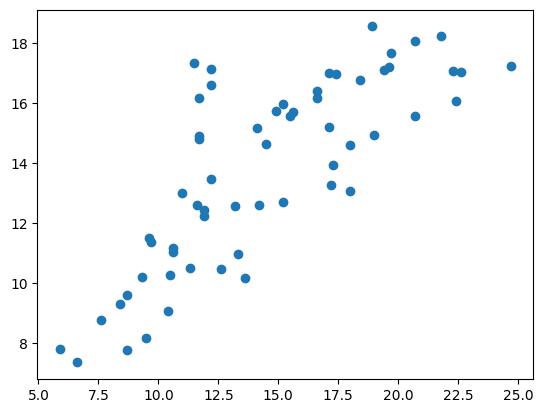

In [37]:
plt.scatter(x= y_test ,y= y_pred)

#Model Evaluation:
- Model evaluation is the process that uses some metrics which help us to analyze the performance of the model.

- There are many metrics like Accuracy, Precision, Recall, F1 score,

- Area under Curve, Confusion Matrix, MAE, MSE & RMSE.

- Cross Validation is one technique that is followed during the training phase and it is a model evaluation technique as well.

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:;
\begin{align*}
\text{MAE} &= \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{align*}


---



- **Mean Squared Error (MSE)** is the mean of the squared errors:
\begin{align*}
\text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}


---



- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
\begin{align*}
\text{RMSE} &= \sqrt{\text{MSE}}
\end{align*}


\begin{align*}
\text{RMSE} &= \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{align*}


---







#MAE , MSE , RMSE (Model Evaluation Metrics)

In [38]:
from sklearn import metrics

print(f"Mean Absolute Error (MAE)        :", metrics.mean_absolute_error(y_test,y_pred))

print(f"Mean Absolute Error (MAE) in %   :", metrics.mean_absolute_percentage_error(y_test,y_pred))

print(f"Mean Squared Error  (MSE)        :",metrics.mean_squared_error(y_test,y_pred))

print(f"Mean Squared Error(MSE)in log    :",metrics.mean_squared_log_error(y_test,y_pred))

print(f"Root Mean Squared Error (RMSE)   :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error (MAE)        : 2.161984932672072
Mean Absolute Error (MAE) in %   : 0.14875874931647123
Mean Squared Error  (MSE)        : 7.975798532854851
Mean Squared Error(MSE)in log    : 0.029429324426775403
Root Mean Squared Error (RMSE)   : 2.8241456288327007


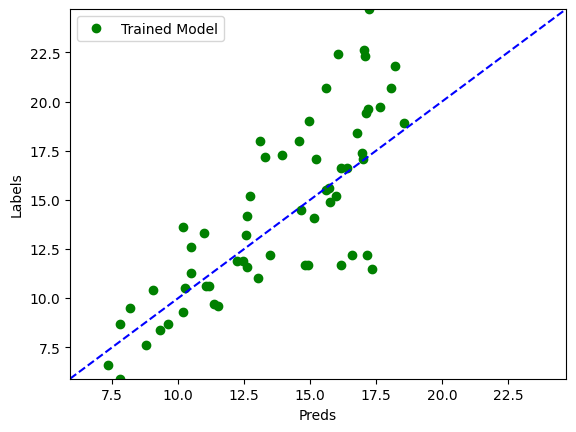

In [39]:
plt.plot(y_pred, y_test, 'go', label='Trained Model')
plt.xlabel('Preds')
plt.ylabel('Labels')
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.xlim([y_min, y_max])
plt.ylim([y_min, y_max])
plt.plot([y_min, y_max], [y_min, y_max], 'b--')
plt.legend()
plt.show()


#Residuals:

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

<Axes: xlabel='sales', ylabel='Density'>

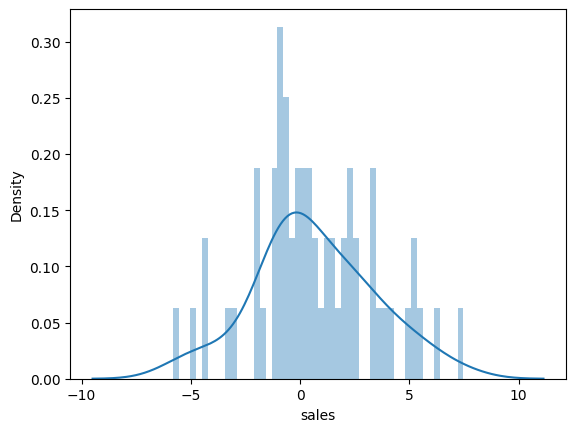

In [40]:
sns.distplot((y_test-y_pred), bins = 50)

#Conclusion:
1.TV, Newspaper and radio advertising affect the target variable Sales. The order of correlation with sales given by ***TV AdV > Radio Adv > Newspaper Adv***.

2.The linear model created with TV, Newspaper and radio as input variable and Sales as Target variable gave the higher r2score.

3.The linear model created with TV as input varaible and Sales as Target variable gave the second highest r2score.

4.The linear models created with Radio and Newspapaer as input varaibles and Sales as Target variable has very less r2 score.

5.Therefore inorder to create a suitable model which approxiamates the scenario correctly, we need to use the combination of TV, Radio and Newspaper as target variable.

6.It is clear from the model and correlation matrix that Amount spend on TV ads direclty impact the Sales of a particular product.

7.We can conclude from the R2 value that only input variable TV advertsisements provides a satisfactory result.